# Difference between the functions STDEV.P and STDEV.S in MS. Excel

#### Packages

In [274]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import random
import statistics
from scipy.stats import norm
import math
from sklearn import preprocessing

#### Importing Sample Data Set

The DataSet used is a sample dataset retrieved from fivethirtyeight.com [7]. It is based on the Aviaton Safety Networks database [8], which looks at airline safety records over 30 years. This sample looks at incidents between 1985-1999 and 2000-2014 and for this example the **incident_00_14** column will be used for calculations on standard deviation. (Inpsiration may have been taken from the movie Rain Man[9])

[7] https://fivethirtyeight.com/features/should-travelers-avoid-flying-airlines-that-have-had-crashes-in-the-past/
[8] https://aviation-safety.net/index.php
[9] Levinson, Barry, Mark Johnson, Barry Morrow, Ronald Bass, Dustin Hoffman, Tom Cruise, Valeria Golino, and Hans Zimmer. Rain Man. Santa Monica, CA: MGM Home Entertainment, 2004. https://www.imdb.com/title/tt0095953/

In [264]:
#loading in the dataset
data = pd.read_csv('dataset/airline-safety/airline-safety.csv')

df = pd.DataFrame(data)
#using the column for airline incidents between 2000 and 2014
incidents = df['incidents_00_14']
airlines = df['airline']
#Print the total number of airlines
print('Total number of airlines: ' , len(airlines)-1)
print('Viewing the first 10 data entries: ')
# View the two columns(show the first 10)
df[['airline', 'incidents_00_14']].head(10)

Total number of airlines:  55
Viewing the first 10 data entries: 


,airline,incidents_00_14
0,Aer Lingus,0
1,Aeroflot*,6
2,Aerolineas Argentinas,1
3,Aeromexico*,5
4,Air Canada,2
5,Air France,6
6,Air India*,4
7,Air New Zealand*,5
8,Alaska Airlines*,5
9,Alitalia,4


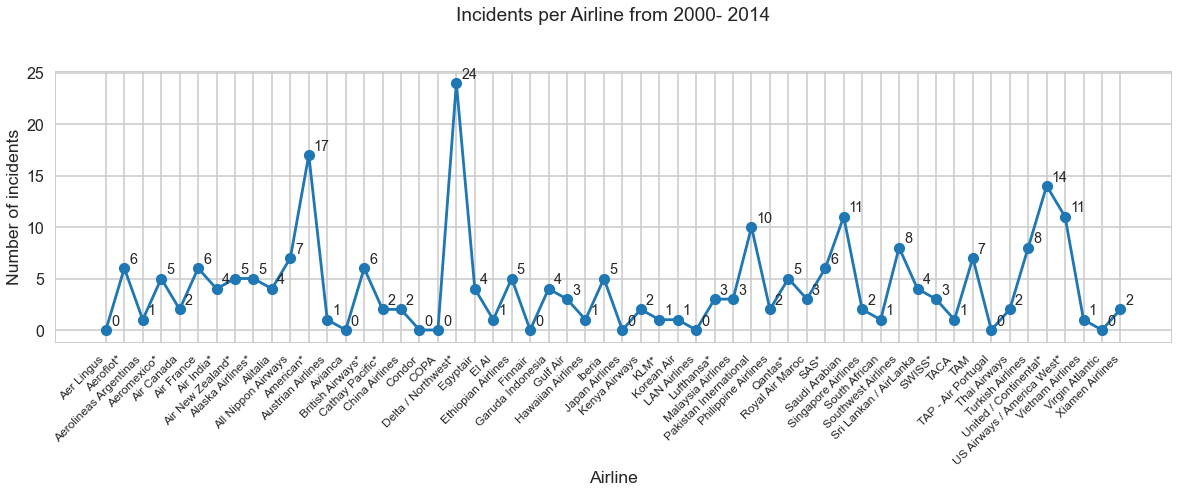

In [250]:
def createGraph():
    # Set figure size
    plt.figure(figsize=(20, 5))
    #Set X&Ylabel
    plt.ylabel("Number of incidents")
    plt.xlabel("Airline")
    plt.title('Incidents per Airline from 2000- 2014', loc='center', pad=50)
    # Create plot
    plt.plot(airlines, incidents,marker='o');
    #Spread out the xlabels and rotate them 45degrees
    plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  )

    # zip joins x and y coordinates in pairs
    for x,y in zip(airline,incidents):
        plt.annotate(y, 
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,5), # distance from text to points (x,y)
                 ha='left', # horizontal alignment can be left, right or center
                fontsize='x-large' ) 
    
createGraph()

## Population Variance

Variance $(\sigma)^2$ is a measure of the spread of dataset[4] and can be calculated by the following steps:

    1. Calculate the mean of the dataset (ie the sum of all the values in the dataset divided by the total number of data).
    
\begin{equation}
 \bar{x} = {\frac{\sum{(x_i)}}{n}}
\end{equation}
    
    2. Individually subtracting the mean from each number in the dataset, which gives the distance each value is from the mean.
\begin{equation}
 ({x_0-\bar{x}}), ({x_1-\bar{x}}), ({x_2-\bar{x}}).... ({x_i-\bar{x}})
\end{equation}
    
    3. Squaring the result of each distance so that they are positive and adding all the postitive distances together.
\begin{equation}
  {{\sum{(x-\bar{x})}^2}}
\end{equation}

    4. Finally divide the sum of the square distances by the number of values in the data set.[5]
\begin{equation}
 \sigma^2 = {\frac{\sum{(x-\bar{x})}^2}{n}}
\end{equation}


[5]https://www.sciencebuddies.org/science-fair-projects/science-fair/variance-and-standard-deviation#:~:text=You%20take%20the%20sum%20of,the%20two%20equations%20are%20equivalent.

[4] https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214891-eng.htm





## Calculate the Population Variance in the number of Incidents from the Dataset

In [221]:
def variance(data):
    n = len(data)
    mean = sum(data)/n
    dev = [(x- mean) ** 2 for x in data]
    variance = sum(dev) /n
    return variance

mean = sum(incidents)/len(incidents)
print("The mean : ", mean)
print("The variance in the number of incidents is : ",variance(incidents))

The mean :  4.125
The variance in the number of incidents is :  20.287946428571427


### Reviewing the Variance of ~20.3

A variance of $\sim 20.3$ makes sense when looking at the graph of our data. The values range from many having 0 incidents to one even having as high a values as 24. The data is a bit spread out from the mean of 4.125, and so it's understandable that the variance would be a bit high.

## Population Standard Deviation

The Population Standard Deviation [6] ($\sigma$) is simply the positive square root of the variance $(\sigma)^2$ and is often used to measure the disperion of a data/numbers (ie scatter).[3] 

\begin{equation}
\sigma = \sqrt{\frac{\sum{(x-\bar{x})}^2}{n}}
\end{equation}

If the data set *n* is considered a "population", it means that dataset *n* contains **all** the possible data values of specific dataset.[6]

[6]https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review#:~:text=Standard%20deviation%20measures%20the%20spread%20of%20a%20data%20distribution.&text=If%20the%20data%20is%20being,n%2D1%20n%E2%88%921%20.

[3]Dukkipati, Rao V, and Q. Probability and Statistics. Tunbridge Wells: New Academic Science, 2011. Web. pg 13

[2]https://mathworld.wolfram.com/StandardDeviation.html

## STDEV.P

STDEV.P is the function for the Population Standard Deviation that's been described.

On the Microsoft website it describes "STDEV.P uses the following formula:"[1]
\begin{equation}
\sqrt{\frac{\sum{(x-\bar{x})}^2}{n}}
\end{equation}

Which we now understand to be the Population Standard Deviation.

[1]https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

## Getting the Population Standard Deviation of the DataSet

In [216]:
def popSTDEVP(data):
    return math.sqrt(variance(data))

STDEV_P = popSTDEVP(incidents)
print("Taking the square root of the variance:")
print("\nCalculation of the Popuation Standard Deviation of incidents is :", popSTDEVP(incidents))
print("\nCalculate using pythons statistic library => statistics.pstdev(incidents) =",statistics.pstdev(incidents))

Taking the square root of the variance:

Calculation of the Popuation Standard Deviation of incidents is : 4.504214296475183

Calculate using pythons statistic library => statistics.pstdev(incidents) = 4.504214296475183


<ErrorbarContainer object of 3 artists>

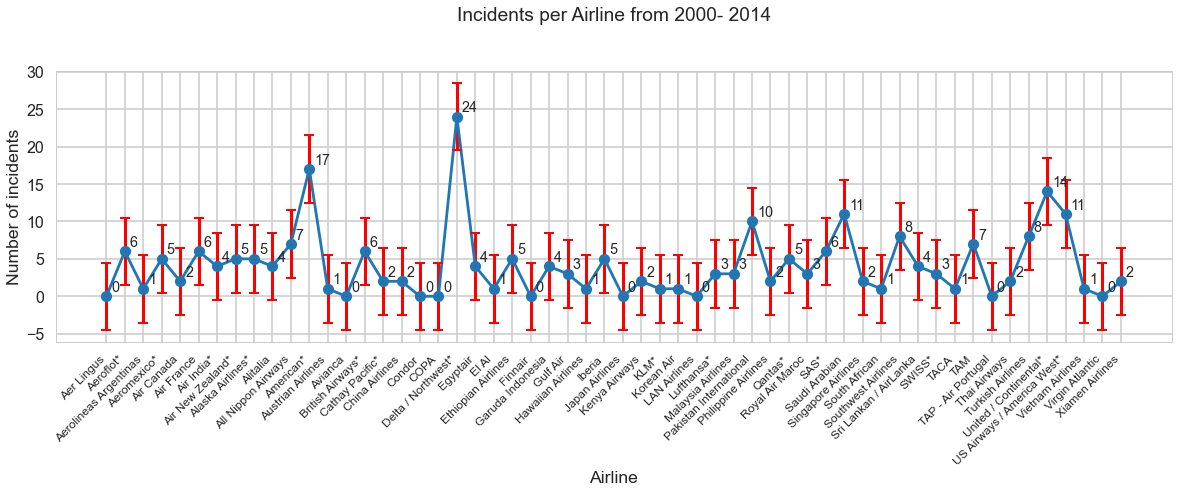

In [269]:
createGraph()
# Line color for error bar
#color_STDEV_P = 'red'

plt.errorbar( airlines, incidents, yerr=STDEV_P, fmt='o', color='red', elinewidth=3,capthick=2,errorevery=1, alpha=1, ms=1, capsize = 5)


[[0.         0.131275   0.02187917 0.10939583 0.04375833 0.131275
  0.08751667 0.10939583 0.10939583 0.08751667 0.15315417 0.37194584
  0.02187917 0.         0.131275   0.04375833 0.04375833 0.
  0.         0.5251     0.08751667 0.02187917 0.10939583 0.
  0.08751667 0.0656375  0.02187917 0.10939583 0.         0.04375833
  0.02187917 0.02187917 0.         0.0656375  0.0656375  0.21879167
  0.04375833 0.10939583 0.0656375  0.131275   0.24067084 0.04375833
  0.02187917 0.17503333 0.08751667 0.0656375  0.02187917 0.15315417
  0.         0.04375833 0.17503333 0.30630834 0.24067084 0.02187917
  0.         0.04375833]]


(array([9., 9., 0., 8., 5., 0., 5., 6., 0., 4., 2., 0., 2., 0., 0., 1., 2.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ,  4.66666667,  5.33333333,  6.        ,
         6.66666667,  7.33333333,  8.        ,  8.66666667,  9.33333333,
        10.        , 10.66666667, 11.33333333, 12.        , 12.66666667,
        13.33333333, 14.        , 14.66666667, 15.33333333, 16.        ,
        16.66666667, 17.33333333, 18.        , 18.66666667, 19.33333333,
        20.        , 20.66666667, 21.33333333, 22.        , 22.66666667,
        23.33333333, 24.        ]),
 <a list of 36 Patch objects>)

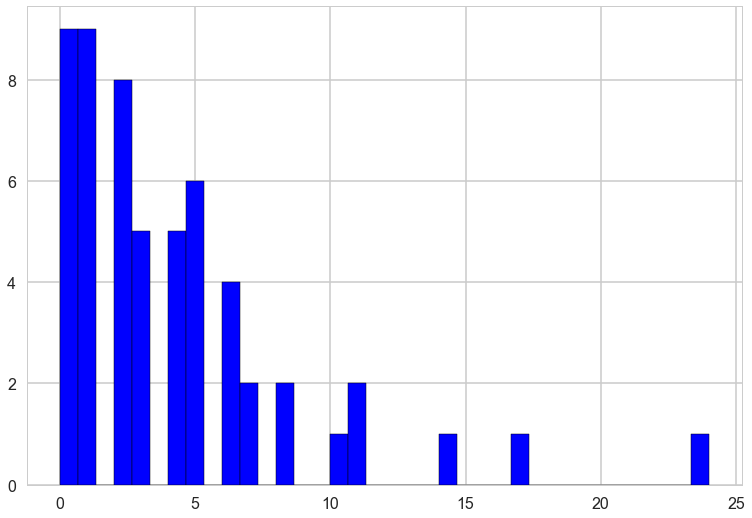

In [285]:
incident_array = np.array(incidents)
normalized_arr = preprocessing.normalize([incident_array])
print(normalized_arr)
# matplotlib histogram
plt.hist(incidents, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

## STDEV.S

"STDEV.S uses the following formula:"[2]
\begin{equation}
\sqrt{\frac{\sum{(x-\bar{x})}^2}{n-1}}
\end{equation}

https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23#:~:text=Remarks-,STDEV.,P.

In [186]:
print("Standard Deviation of sample is % s " 
                % (statistics.stdev(incidents))) 

Standard Deviation of sample is 4.544977247667823 
